## Skoltech
## Intro to data science, fall 2020
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/1zwUO1KZNDTZYuD12dyMO3CaErGHnZuHx1Mdbo-c11ME/

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q5) do not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=29

#### Import basic libraries

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Dataset
For the task we'll use kickstarter dataset. Kickstarter is the crowdfounding platform, where people can announce their project with financial goals and other can support the projects by paying the money ("pledging"). The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal. Let's take a brief look to the dataset.

In [273]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)

In [274]:
df.sample(5)

name        category  \
ID                                                                              
271822089               BallBot1P Teaching Aide and Robot Toy  Product Design   
1902279961  Miami Coffee Cycle, your mobile coffee shop on...            Food   
64687116                                        Tangaru Tunes            Apps   
1683269101                         Doghouse Roses Third album  Country & Folk   
463015858                   Lucky Swarovski Crystal Bracelets          Crafts   

           main_category currency    deadline     goal             launched  \
ID                                                                            
271822089         Design      USD  2012-04-30  60000.0  2012-03-01 19:45:00   
1902279961          Food      USD  2015-01-23   5000.0  2014-12-09 18:18:55   
64687116      Technology      USD  2015-02-27  25000.0  2015-01-28 05:05:58   
1683269101         Music      GBP  2016-08-24   3500.0  2016-07-27 09:49:49   
463015858         Crafts      USD  2013-03-03    300.0  2013-02-11 17:15:13   

            pledged       state  backers country  usd pledged  \
ID                                                              
271822089   10474.0      failed        9      US     10474.00   
1902279961     63.0      failed        7      US        63.00   
64687116        1.0      failed        1      US         1.00   
1683269101   3991.0  successful       65      GB       515.17   
463015858       0.0      failed        0      US         0.00   

            usd_pledged_real  usd_goal_real  
ID                                           
271822089            10474.0       60000.00  
1902279961              63.0        5000.00  
64687116                 1.0       25000.00  
1683269101            5273.1        4624.37  
463015858                0.0         300.00

In [275]:
df.shape

(378661, 14)

In [276]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

# Section 1. Dataset acquaintance

-----

### Q1.1

#### How many NaN values are there in the dataset?

In [277]:
df.isna().sum()
#let's drop NaNs??


name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [278]:
df.dropna() 

name  \
ID                                                              
1000002330                    The Songs of Adelaide & Abullah   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
1000004038                                     Where is Hank?   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
1000011046  Community Film Project: The Art of Neighborhoo...   
...                                                       ...   
999976400   ChknTruk Nationwide Charity Drive 2014 (Canceled)   
999977640                                           The Tribe   
999986353   Walls of Remedy- New lesbian Romantic Comedy f...   
999987933                            BioDefense Education Kit   
999988282                   Nou Renmen Ayiti!  We Love Haiti!   

                   category main_category currency    deadline     goal  \
ID                                                                        
1000002330           Poetry    Publishing      GBP  2015-10-09   1000.0   
1000003930   Narrative Film  Film & Video      USD  2017-11-01  30000.0   
1000004038   Narrative Film  Film & Video      USD  2013-02-26  45000.0   
1000007540            Music         Music      USD  2012-04-16   5000.0   
1000011046     Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                     ...           ...      ...         ...      ...   
999976400       Documentary  Film & Video      USD  2014-10-17  50000.0   
999977640    Narrative Film  Film & Video      USD  2011-07-19   1500.0   
999986353    Narrative Film  Film & Video      USD  2010-08-16  15000.0   
999987933        Technology    Technology      USD  2016-02-13  15000.0   
999988282   Performance Art           Art      USD  2011-08-16   2000.0   

                       launched  pledged     state  backers country  \
ID                                                                    
1000002330  2015-08-11 12:12:28      0.0    failed        0      GB   
1000003930  2017-09-02 04:43:57   2421.0    failed       15      US   
1000004038  2013-01-12 00:20:50    220.0    failed        3      US   
1000007540  2012-03-17 03:24:11      1.0    failed        1      US   
1000011046  2015-07-04 08:35:03   1283.0  canceled       14      US   
...                         ...      ...       ...      ...     ...   
999976400   2014-09-17 02:35:30     25.0  canceled        1      US   
999977640   2011-06-22 03:35:14    155.0    failed        5      US   
999986353   2010-07-01 19:40:30     20.0    failed        1      US   
999987933   2016-01-13 18:13:53    200.0    failed        6      US   
999988282   2011-07-19 09:07:47    524.0    failed       17      US   

            usd pledged  usd_pledged_real  usd_goal_real  
ID                                                        
1000002330          0.0               0.0        1533.95  
1000003930        100.0            2421.0       30000.00  
1000004038        220.0             220.0       45000.00  
1000007540          1.0               1.0        5000.00  
1000011046       1283.0            1283.0       19500.00  
...                 ...               ...            ...  
999976400          25.0              25.0       50000.00  
999977640         155.0             155.0        1500.00  
999986353          20.0              20.0       15000.00  
999987933         200.0             200.0       15000.00  
999988282         524.0             524.0        2000.00  

[374860 rows x 14 columns]

----
3801

----

Let us simplify the task a little bit: we are aiming to predict either project fails or not.
Thus 'success' projects will be encoded as 1, with state ['failed', 'canceled'] as 0 and we remove the rows with any other state.

### Q1.2 
#### How many '1' values are in resulting dataset (in state column)?

In [279]:
df.drop(df[(df.state == 'live') |(df.state == 'undefined')|(df.state == 'suspended')].index, inplace=True)

In [280]:
df["state"].value_counts()

failed        197719
successful    133956
canceled       38779
Name: state, dtype: int64

In [281]:
df['state'] = (df['state'] == 'successful').astype(int)


In [282]:
df['state'].value_counts()

0    236498
1    133956
Name: state, dtype: int64

In [283]:
#df['state'].apply(lambda x: 1 if x=='successful' else 0)

In [284]:
#df.state.value_counts()

-----

Answer: 133956

------

### Q1.3
#### Whats is a name of a project attracted the biggest pay check? (on average). Use column usd_pledged_real to judge. If there are multiple projects, choose any single one.

In [285]:
df["backers"].value_counts()
#the problem is that we have a lot of zero bakers. what should we do with this situation?

0       50882
1       34280
2       22866
3       15855
4       11887
        ...  
7257        1
2495        1
6589        1
3419        1
3196        1
Name: backers, Length: 3940, dtype: int64

In [286]:

df['avg_bill'] = df[["usd_pledged_real", "backers"]].apply(lambda x: x[0]/x[1] if x[1]!=0 else -1, axis=1)
#let's change "inf" to -1


In [287]:
df.head(3)

name        category  \
ID                                                                          
1000002330                The Songs of Adelaide & Abullah          Poetry   
1000003930  Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                 Where is Hank?  Narrative Film   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   

            pledged  state  backers country  usd pledged  usd_pledged_real  \
ID                                                                           
1000002330      0.0      0        0      GB          0.0               0.0   
1000003930   2421.0      0       15      US        100.0            2421.0   
1000004038    220.0      0        3      US        220.0             220.0   

            usd_goal_real    avg_bill  
ID                                     
1000002330        1533.95   -1.000000  
1000003930       30000.00  161.400000  
1000004038       45000.00   73.333333

In [288]:
df['avg_bill'].max()

10000.0

In [289]:
df.name[df['avg_bill'] == df['avg_bill'].max()].values[0]

'Patented (9 seasons) food enhancer'

In [290]:
df[df['avg_bill'] == df['avg_bill'].max()]

name  \
ID                                                              
1459482568                 Patented (9 seasons) food enhancer   
1767293256                                KIRISUTOS PACHYDERM   
1974395971  21st CENTURY MEDICAL PRACTICE SYSTEM THAT CHAN...   
2024799289                              The Commoner Princess   
281085395   "SUNBURN" - starring Michael Madsen, indie act...   
472233286   Hollow Earth Project, Journey to the center of...   
642968820                        Nobody: The Movie (Canceled)   
889803741         Post Traumatic Stress (PTSD) Affects Us All   
912587650            The Hare On The Chair - An Easter Legend   

                    category main_category currency    deadline       goal  \
ID                                                                           
1459482568             Vegan          Food      USD  2016-02-22   150000.0   
1767293256         Animation  Film & Video      USD  2015-05-27  1000000.0   
1974395971       Makerspaces    Technology      USD  2017-05-30   250000.0   
2024799289      Mobile Games         Games      USD  2016-06-03    10000.0   
281085395     Narrative Film  Film & Video      USD  2011-10-02   250000.0   
472233286        Documentary  Film & Video      USD  2016-11-25  1000000.0   
642968820       Film & Video  Film & Video      USD  2015-04-22    60000.0   
889803741        Documentary  Film & Video      USD  2013-09-14  1500000.0   
912587650   Children's Books    Publishing      USD  2015-05-03    48000.0   

                       launched  pledged  state  backers country  usd pledged  \
ID                                                                              
1459482568  2016-01-23 00:02:15  10000.0      0        1      US      10000.0   
1767293256  2015-03-28 03:13:34  10000.0      0        1      US      10000.0   
1974395971  2017-03-31 17:25:35  10000.0      0        1      US          0.0   
2024799289  2016-05-04 10:10:33  10000.0      1        1      US      10000.0   
281085395   2011-08-03 20:09:12  10000.0      0        1      US      10000.0   
472233286   2016-09-26 18:36:53  10000.0      0        1      US      10000.0   
642968820   2015-02-21 23:07:08  10000.0      0        1      US      10000.0   
889803741   2013-08-15 00:07:18  10000.0      0        1      US      10000.0   
912587650   2015-04-03 10:46:03  10000.0      0        1      US      10000.0   

            usd_pledged_real  usd_goal_real  avg_bill  
ID                                                     
1459482568           10000.0       150000.0   10000.0  
1767293256           10000.0      1000000.0   10000.0  
1974395971           10000.0       250000.0   10000.0  
2024799289           10000.0        10000.0   10000.0  
281085395            10000.0       250000.0   10000.0  
472233286            10000.0      1000000.0   10000.0  
642968820            10000.0        60000.0   10000.0  
889803741            10000.0      1500000.0   10000.0  
912587650            10000.0        48000.0   10000.0

In [291]:
df.drop('avg_bill', axis=1, inplace=True)

-----

'Patented (9 seasons) food enhancer'


-----

### Q1.4
#### What is the most successful main category (in terms of success percentage)?

In [292]:
df.groupby('main_category')['state'].mean().sort_values()[-1:]

main_category
Dance    0.625803
Name: state, dtype: float64

-----

-----

### Q1.5
#### Define the category with highest goal per project. How many projects belong to it?  (note: we use category here, not main_category)

In [293]:
df.groupby('category')['goal'].mean().sort_values()

category
Crochet              3.781049e+03
Taxidermy            4.187636e+03
Stationery           4.213168e+03
Poetry               5.342948e+03
Candles              5.678515e+03
                         ...     
Science Fiction      4.299817e+05
Architecture         4.765797e+05
Fantasy              6.216058e+05
Space Exploration    6.245547e+05
Movie Theaters       1.594601e+06
Name: goal, Length: 159, dtype: float64

In [294]:
len(df[df["category"]=='Movie Theaters'])

227

-----

Answer: 227

-----

### Q1.6
#### What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

In [295]:
df.groupby('category')['usd_pledged_real'].sum().sort_values()

category
Taxidermy          3.742699e+04
Crochet            4.820144e+04
Embroidery         9.480322e+04
Quilts             1.704812e+05
Literary Spaces    1.891494e+05
                       ...     
Documentary        1.387601e+08
Hardware           1.568550e+08
Video Games        2.157734e+08
Tabletop Games     4.625972e+08
Product Design     6.284495e+08
Name: usd_pledged_real, Length: 159, dtype: float64

------

Answer: Product Design

------

As one can notice, there are both numerical and object-type data in our dataframe. 

We suggest you to split them to perform EDA separately. 

### Q1.7
#### Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [296]:
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                 int64
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [297]:

num=['goal', 'pledged','usd pledged', 'state','backers','usd_pledged_real', 'usd_goal_real']
al_col=list(df.columns)
obj= [x for x in al_col if x not in num]
print(num,obj)

['goal', 'pledged', 'usd pledged', 'state', 'backers', 'usd_pledged_real', 'usd_goal_real'] ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'country']


In [298]:
df_num=df.drop(columns=obj, axis=1)

In [299]:
df_obj=df.drop(columns=num, axis=1)

In [300]:
#numeric_features = train_data.select_dtypes(include=['int64', 'float64']).drop(['damage_grade'], axis=1).columns
#categorical_features = train_data.select_dtypes(include=['object']).columns

Answer: 7

### Q1.8
#### Let's do a bit of feature engineering. Let's create column 'pledge2goal' which define as ratio of usd_pledged_real to goal. How many outliers are there?
#### (We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [301]:
df["pledge2goal"]=df['usd_pledged_real']/df['goal']

In [302]:
import scipy

In [303]:
df1=df["pledge2goal"]
print(df1.quantile(q=0.50))
q1=df1.quantile(q=0.25)
q3=df1.quantile(q=0.75)
iqr=q3-q1
outlier1=q1-1.5*iqr
outlier2=q3+1.5*iqr
df["is_outlier"]=df["pledge2goal"].apply(lambda x: 1 if (x<outlier1)|(x>outlier2) else 0)
print(len(df[df["is_outlier"]==1]))


0.135
18416


In [304]:
df_with_outliers=df
df=df.drop(df[(df['is_outlier'] == 1)].index)

In [305]:
#df.drop(labels='is_outlier', axis=1, inplace=True)

#### Answer: 18416

### Q1.9
#### Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the ratio matters.
- B. Distributions have almost no intersection, the bigger ratio, the bigger success.
- C. Distributions intersect significantly, the bigger ratio, the bigger success
- D. Distributions have almost no intersection, the less ratio, the bigger success.

In [306]:
df.state.value_counts()

0    236348
1    115690
Name: state, dtype: int64

Text(0.5, 0, 'real pledge/goal')

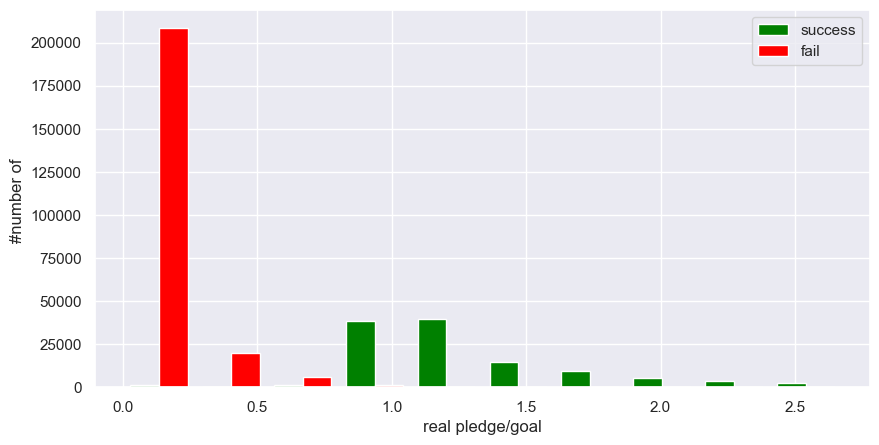

In [307]:
plt.figure(figsize=(10,5), dpi=100)

plt.hist([df.pledge2goal[df.state==1], df.pledge2goal[df.state==0]], bins = 10, label = ['success', 'fail'], color=['green', 'red'])

plt.legend()
#plt.yscale('log')

plt.ylabel('#number of ')

plt.xlabel('real pledge/goal')

-----
### Answer: B

-----

### Q1.10
#### Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer

-----
Answer 1.0, 0.05



-----

### Q1.11
#### Compute Pearson correlation coefficient between the pledge2real and target variable.

In [308]:
# with what?? mb with pledge2goal
df.corr()
#df.state.corrwith(df.pledge2goal) why don't

goal   pledged     state   backers  usd pledged  \
goal              1.000000  0.012889 -0.023856  0.005924     0.010573   
pledged           0.012889  1.000000  0.151025  0.539311     0.569334   
state            -0.023856  0.151025  1.000000  0.201122     0.197329   
backers           0.005924  0.539311  0.201122  1.000000     0.809865   
usd pledged       0.010573  0.569334  0.197329  0.809865     1.000000   
usd_pledged_real  0.010820  0.693048  0.221950  0.834603     0.941128   
usd_goal_real     0.939060  0.006297 -0.022718  0.006682     0.012157   
pledge2goal      -0.026673  0.142189  0.902093  0.233537     0.222616   
is_outlier             NaN       NaN       NaN       NaN          NaN   

                  usd_pledged_real  usd_goal_real  pledge2goal  is_outlier  
goal                      0.010820       0.939060    -0.026673         NaN  
pledged                   0.693048       0.006297     0.142189         NaN  
state                     0.221950      -0.022718     0.902093         NaN  
backers                   0.834603       0.006682     0.233537         NaN  
usd pledged               0.941128       0.012157     0.222616         NaN  
usd_pledged_real          1.000000       0.011823     0.249579         NaN  
usd_goal_real             0.011823       1.000000    -0.024775         NaN  
pledge2goal               0.249579      -0.024775     1.000000         NaN  
is_outlier                     NaN            NaN          NaN         NaN

----
Answer: 0.906

-----

### Q1.12
#### Visualize dependancy of numerical data with success. What can you say about it?

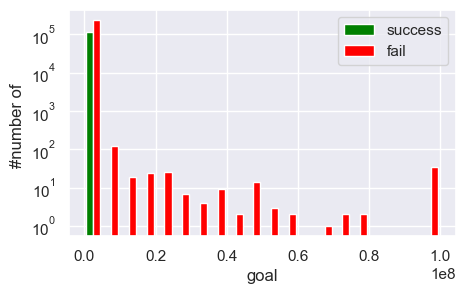

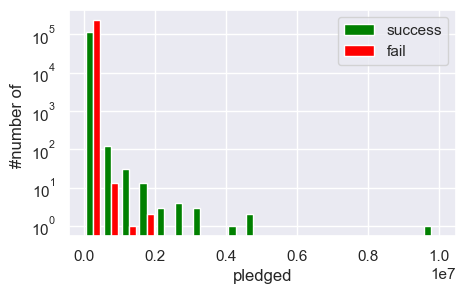

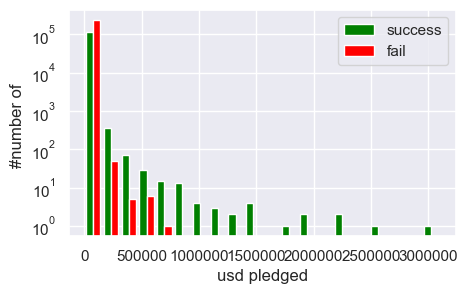

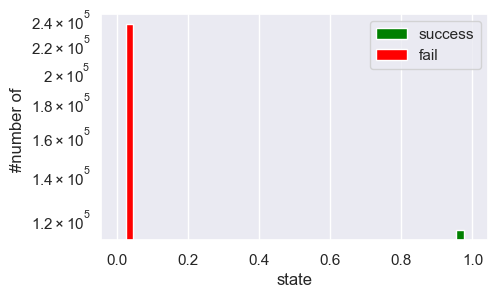

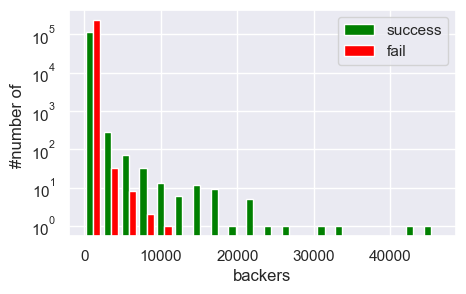

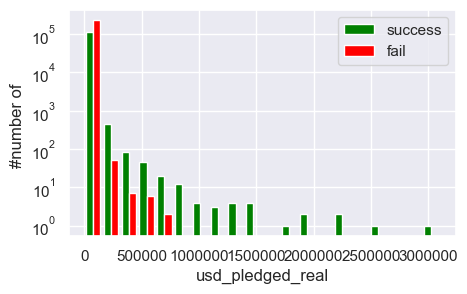

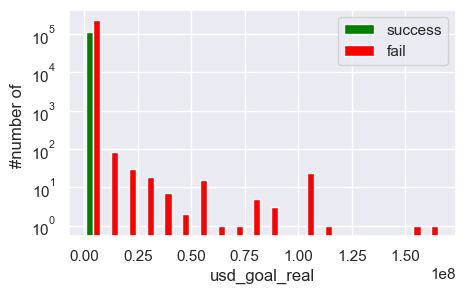

In [309]:
num=['goal', 'pledged','usd pledged', 'state','backers','usd_pledged_real', 'usd_goal_real']
for x in num:
    plt.figure(figsize=(5,3), dpi=100)
    plt.hist([df[x][df.state==1], df[x][df.state==0]], bins = 20, label = ['success', 'fail'], color=['green', 'red'])
    plt.legend()
   # plt.title()
    plt.ylabel('#number of ')
    plt.yscale('log')
    plt.xlabel(x)
    plt.show()

Small goal - success
Bigger goal - fail


### Let's return rows with outlying values to df

In [310]:
df=df_with_outliers
df = df.drop(columns='is_outlier', axis = 1)

# Feature generation
Lets' generate some more feature that could be useful

### Q2.1 Create a year column that would hold the year. How many projects were in year 2012?

In [311]:
df['date'] = pd.to_datetime(df['launched'])

In [312]:
df["year"] = df.date.dt.year
#data["month"] = data.date.dt.month
#data["day"] = data.date.dt.day
df.head(3)

name        category  \
ID                                                                          
1000002330                The Songs of Adelaide & Abullah          Poetry   
1000003930  Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                 Where is Hank?  Narrative Film   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   

            pledged  state  backers country  usd pledged  usd_pledged_real  \
ID                                                                           
1000002330      0.0      0        0      GB          0.0               0.0   
1000003930   2421.0      0       15      US        100.0            2421.0   
1000004038    220.0      0        3      US        220.0             220.0   

            usd_goal_real  pledge2goal                date  year  
ID                                                                
1000002330        1533.95     0.000000 2015-08-11 12:12:28  2015  
1000003930       30000.00     0.080700 2017-09-02 04:43:57  2017  
1000004038       45000.00     0.004889 2013-01-12 00:20:50  2013

In [313]:
cond1=df.year==2012
df[cond1].shape[0]

41111

Answer: 39641

### Q2.2 Make a column 'duration_days' with number of full days from launch to deadline.
What is median value for this column?

In [314]:
df['duration_days']=(pd.to_datetime(df["deadline"])-df["date"]).dt.days

In [315]:
df.duration_days.median()

29.0

### Q2.3 Delete mistaken value from column 'country'. What is the value?

In [316]:
df["country"].unique()



array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG', 'N,0"',
       'JP'], dtype=object)

In [317]:
df=df.drop(df[(df['country'] == 'N,0"')].index)

Answer: N,0"

### Q2.4 Make column 'region' out of column country (america, europe, asia, oceania(including australiza/nz))
Where is the region with the worst conversion rate (percentage of successful projects)

In [318]:
df["country"].unique()


array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG', 'JP'],
      dtype=object)

In [319]:
di={'GB':'europe', 'US': 'america', 'CA':'america', 
    'AU':'oceania', 'NO':'europe', 'IT':'europe', 'DE':'europe', 
    'IE':'europe', 'MX':'america', 'ES':'europe', 'SE':'europe', 
    'FR':'europe', 'NL':'europe', 'NZ':'oceania', 'CH':'asia', 
    'AT':'europe', 'BE':'europe', 'DK':'europe', 'HK':'asia' , 
    'LU':'europe', 'SG':'asia' , 'JP':'asia' }

In [320]:
#df.replace({"country":di})

In [321]:
df['region']=df['country'].map(di) 


In [322]:
df.head(3)

name        category  \
ID                                                                          
1000002330                The Songs of Adelaide & Abullah          Poetry   
1000003930  Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                 Where is Hank?  Narrative Film   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   

            pledged  state  backers country  usd pledged  usd_pledged_real  \
ID                                                                           
1000002330      0.0      0        0      GB          0.0               0.0   
1000003930   2421.0      0       15      US        100.0            2421.0   
1000004038    220.0      0        3      US        220.0             220.0   

            usd_goal_real  pledge2goal                date  year  \
ID                                                                 
1000002330        1533.95     0.000000 2015-08-11 12:12:28  2015   
1000003930       30000.00     0.080700 2017-09-02 04:43:57  2017   
1000004038       45000.00     0.004889 2013-01-12 00:20:50  2013   

            duration_days   region  
ID                                  
1000002330             58   europe  
1000003930             59  america  
1000004038             44  america

In [323]:
df['region'].unique()

array(['europe', 'america', 'oceania', 'asia'], dtype=object)

In [324]:
df.groupby('region')['state'].mean()

region
america    0.372220
asia       0.317495
europe     0.317587
oceania    0.269932
Name: state, dtype: float64

Answer: oceania

### Q2.5 For each main_category leave only the three most popular category and replace other with "other"
What is the most frequent subcategory for design?

In [325]:
q=df.groupby('main_category')["category"].value_counts()

In [326]:
gp = df.groupby('main_category')['category'].value_counts()

In [327]:
gp = gp.to_frame(name = 'cat_count').reset_index()

In [328]:
gp

main_category      category  cat_count
0             Art           Art       8155
1             Art      Painting       3263
2             Art  Illustration       3125
3             Art    Public Art       3060
4             Art   Mixed Media       2734
..            ...           ...        ...
165       Theater     Festivals        546
166       Theater  Experimental        368
167       Theater     Immersive        323
168       Theater        Spaces        212
169       Theater        Comedy         96

[170 rows x 3 columns]

In [329]:
gpp =gp.groupby('main_category')['cat_count'].nlargest(3)

In [330]:
gpp = gpp.to_frame().reset_index()

popular_categories = gp.category[gpp.level_1]

pop_cat = popular_categories.reset_index().category

popular = []
for i in np.arange(len(pop_cat)):
    popular += [pop_cat[i]]
    
    
def categ(x):
    if x not in popular:
        return 'other'
    else:
        return x
    
df['category'] = df.category.apply(categ)

In [331]:
df.category.value_counts()

other               117811
Product Design       21886
Documentary          16065
Tabletop Games       14036
Music                13208
Shorts               12303
Video Games          11690
Food                 11395
Film & Video          9149
Fiction               9107
Fashion               8474
Nonfiction            8259
Art                   8155
Theater               7036
Apparel               7029
Technology            6742
Rock                  6717
Children's Books      6711
Apps                  6239
Photography           5729
Indie Rock            5639
Web                   5055
Comics                4973
Crafts                4603
Design                4122
Painting              3263
Games                 3171
Illustration          3125
Accessories           3080
Restaurants           2775
Comic Books           2707
Drinks                2367
Dance                 2314
Graphic Design        1990
Graphic Novels        1839
Journalism            1717
Photobooks            1565
P

In [332]:
gp[gp.main_category=='Design']

main_category            category  cat_count
39        Design      Product Design      21886
40        Design              Design       4122
41        Design      Graphic Design       1990
42        Design        Architecture        738
43        Design  Interactive Design        393
44        Design        Civic Design        281
45        Design          Typography        105

### Answer: Product Design



### Q2.6 create the columns "name_length" with length of the name.
What is the biggets length?

In [333]:
df_25=df #backup_copy


In [335]:
df.isna().sum()

name                3
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
pledge2goal         0
date                0
year                0
duration_days       0
region              0
dtype: int64

In [336]:
df=df.dropna()
df["name_length"] = df["name"].apply(lambda x: len(str(x)))

In [337]:
df.name_length.max()

96

Answer: 96

# Preprocessing

### Q3.1 Drop the leaking columns
Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them


In [338]:
df31=df

In [340]:
#pledged, backers, 
df=df.drop(columns=['pledged','usd pledged', 'usd_pledged_real','date', 'backers', 'pledge2goal'], axis=1)
df.head(3)

name category  \
ID                                                                   
1000002330                The Songs of Adelaide & Abullah    other   
1000003930  Greeting From Earth: ZGAC Arts Capsule For ET    other   
1000004038                                 Where is Hank?    other   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   

            state country  usd_goal_real  year  duration_days   region  \
ID                                                                       
1000002330      0      GB        1533.95  2015             58   europe   
1000003930      0      US       30000.00  2017             59  america   
1000004038      0      US       45000.00  2013             44  america   

            name_length  
ID                       
1000002330           31  
1000003930           45  
1000004038           14

In [341]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'state', 'country', 'usd_goal_real', 'year',
       'duration_days', 'region', 'name_length'],
      dtype='object')

In [342]:
#df.is_outlier_0.value_counts()
df.shape

(370219, 14)

### Q3.2 Deal with the categorical features.
Lets drop some more columns for now (name, deadline, launched, country, usd_goal_real). Note: you can re-use these columns in the Q5 section. 
Preprocess the rest of categorical columns. How many columns do you have now?

In [343]:
#df32=df
df=df.drop(columns=['name','deadline', 'launched','country', 'usd_goal_real'], axis=1)

In [344]:
df.shape

(370219, 9)

In [345]:
df.dtypes
features_to_encode=['category', 'main_category', 'currency', 'year', 'region']
df=pd.get_dummies(df, columns=features_to_encode)

In [346]:
df.head(3)

goal  state  duration_days  name_length  category_Accessories  \
ID                                                                             
1000002330   1000.0      0             58           31                     0   
1000003930  30000.0      0             59           45                     0   
1000004038  45000.0      0             44           14                     0   

            category_Apparel  category_Apps  category_Art  \
ID                                                          
1000002330                 0              0             0   
1000003930                 0              0             0   
1000004038                 0              0             0   

            category_Children's Books  category_Comic Books  ...  year_2013  \
ID                                                           ...              
1000002330                          0                     0  ...          0   
1000003930                          0                     0  ...          0   
1000004038                          0                     0  ...          1   

            year_2014  year_2015  year_2016  year_2017  year_2018  \
ID                                                                  
1000002330          0          1          0          0          0   
1000003930          0          0          0          1          0   
1000004038          0          0          0          0          0   

            region_america  region_asia  region_europe  region_oceania  
ID                                                                      
1000002330               0            0              1               0  
1000003930               1            0              0               0  
1000004038               1            0              0               0  

[3 rows x 93 columns]

In [347]:
df.shape

(370219, 93)

Answer: 93

### Q3.3 Split the dataset
Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

In [348]:
from sklearn.model_selection import train_test_split
df33=df
#df33=df33.drop(...)

y = df33['state'] 
X = df33.drop('state', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape[0],X_test.shape[0])


296175 74044


In [349]:
y_train.value_counts()

0    189041
1    107134
Name: state, dtype: int64

Answer: 92488



### Q3.4 Scale the numeric columns with standard scaler
What is max number in goal field after scaling?

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [351]:
max(X_train[:,0].max(),X_test[:,0].max())

93.26426315218663

Answer: 93.264

# Feature selection

### Q4.1 Estimate feature importance by Anova
What is the two most important features by anova with f classifier?

In [89]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
# ANOVA
selector = SelectKBest(f_classif, k=2)
selector.fit(X, y)
# SelectKBest just selects the specified number of features with the highest scores 
print(X.shape) 
X_reduced = selector.transform(X)
print(X_reduced.shape)
# and what about scores?
q=selector.scores_
print(selector.scores_)
# it selects the wrong variable!

(370219, 80)
(370219, 2)
[2.30908540e+02 2.88479287e+02 1.63198854e+03 8.00119777e+02
 2.50695222e+03 1.03570630e+02 6.51809169e+02 4.43187853e+02
 2.40503818e+02 9.39758785e+02 6.34918346e+00 3.77835741e+00
 4.01689138e+02 5.48363357e+02 2.65753505e+02 2.03935432e+00
 2.83835443e+02 5.61139263e+01 8.34620637e+02 3.06890500e+02
 1.23511266e+00 2.99459943e+02 1.33052744e+01 2.92961815e+01
 3.09236188e+02 4.89085821e-01 4.70007400e+02 7.55701953e+02
 1.81181959e+03 2.51661656e+03 8.23601657e+02 2.18695742e+03
 1.30037482e+03 1.67328225e+03 5.79039069e+01 2.31317564e+01
 3.47346743e+02 1.61596639e+03 5.29811095e+02 1.14528267e+03
 2.37447781e+00 1.30463017e+03 1.02530901e+02 1.38488076e+03
 1.63857139e-01 4.30732602e+02 4.15121729e+03 1.28526882e+02
 4.04982620e+02 3.84451679e+03 2.82609389e+03 3.39168378e+02
 3.84213809e+02 3.69028208e+01 3.99443075e+00 1.28687928e+03
 4.92528152e-01 1.12414868e+00 2.47465745e+00 1.00418434e+02
 4.94474976e+01 1.37831667e+01 3.18582711e+01 8.94610383e-01

In [90]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.abs(np.transpose(q))})

In [91]:
q=coefficients.sort_values(by=["Coefficients"])
q.iloc[-5:, ]

Feature  Coefficients
29   category_Tabletop Games   2516.616561
72                 year_2015   2520.238235
50     main_category_Theater   2826.093892
49  main_category_Technology   3844.516792
46       main_category_Music   4151.217287

Answer: main_category_Music, main_category_Technology

------

------

## Build a model with logistic regression

Use l2 penalty and search for optimal C in np.logspace(-2, 4, 7).

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Let's built regression with pipeline and GridSearchCV and without it, but with search (vanila, like on first seminars)

In [96]:
logregpipe = Pipeline([('scale', StandardScaler()),
                  ('logreg',LogisticRegression(penalty='l2',n_jobs=-1))])

#logregpipe = Pipeline([('scale', StandardScaler()), ('regressor',LogisticRegression(penalty='l2',n_jobs=-1))])

In [97]:
# Gridsearch to determine the value of C

param_grid = {'logreg__C':np.logspace(-2, 4, 7)}

##param_grid = {'C':np.logspace(-2, 4, 2)}
logreg_cv = GridSearchCV(logregpipe, param_grid, cv=3, return_train_score=True)
logreg_cv.fit(X_train,y_train)
print(logreg_cv.best_params_)

bestlogreg = logreg_cv.best_estimator_
bestlogreg.fit(X_train,y_train)
bestlogreg.coef_ = bestlogreg.named_steps['logreg'].coef_
bestlogreg.score(X_train,y_train)

/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages

/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages

{'logreg__C': 10.0}


/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.6788891702540728

In [98]:
y_ppp=bestlogreg.predict_proba(X_test)

In [99]:
import operator
aa=[abs(x) for x in bestlogreg.coef_[0]]
print(aa)

[13.896260372107037, 1.2715693266746289, 0.14400716460364668, 0.05754982553372993, 0.23632317042247225, 0.0011493803796449851, 0.0011636434031864604, 0.05698602794363905, 0.006435509628539008, 0.0644191186313695, 0.00862145856218584, 0.03833410000163719, 0.04500809357233852, 0.09080450692469474, 0.02644546675982289, 0.0038978447711514996, 0.00800862577508019, 0.0021037989310325033, 0.0034861258836951232, 0.06850806967439878, 0.030477207542372257, 0.04227046184026447, 0.056584022560477905, 0.032489380493980036, 0.004946217906446772, 0.052199737420199184, 0.008944693929404996, 0.011665641330809943, 0.11910766879719537, 0.2299647414777887, 0.0716536025332222, 0.0037242731357331076, 0.02320228238813703, 0.16699338637833147, 0.008951361569213853, 0.008313393791508774, 0.044726764815364896, 0.16647318364252373, 0.09549091860781302, 0.029557161617523742, 0.010618054223381019, 0.06698291393533708, 0.008663159693397014, 0.10936440351788711, 0.11386412901552291, 0.039260894388506336, 0.151805164

In [100]:

a=zip(aa, list(X.columns))

a=sorted(a, key = operator.itemgetter(0))
print(a[-2:])

[(1.2715693266746289, 'duration_days'), (13.896260372107037, 'goal')]


In [101]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [110]:
from sklearn.metrics import mean_squared_error as mse

In [111]:
rmse_val = {}
for c in np.logspace(-2, 4, 7):
    reg = LogisticRegression(penalty='l2',C=c, n_jobs=-1)
    reg.fit(X_train, y_train)
    y_val_pred = reg.predict(X_val)
    rmse_val[c] = np.sqrt(mse(y_val_pred, y_val))
    
print(min(rmse_val.items(), key=lambda x: x[1]))

/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages

(10000.0, 0.566204459982368)


In [112]:
#q=np.squeeze(bestlogreg.coef_)

In [122]:
z=min(rmse_val.items(), key=lambda x: x[1])
z[0]

10000.0

In [113]:
from sklearn.metrics import classification_report

In [120]:
#target_names = y_test.unique().astype(str)
#y_pred = bestlogreg.predict(X_test)
#reg = LogisticRegression(penalty='l2',C=100, n_jobs=-1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#print(classification_report(y_test, y_pred, target_names=target_names))

In [123]:
best_reg=LogisticRegression(penalty='l2',C=z[0], n_jobs=-1)

In [115]:
#len(bestlogreg.coef_[0])

In [126]:
best_reg.fit(X_train, y_train)
y_pred = best_reg.predict(X_test)
accuracy_score(y_pred, y_test)

/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.6770568850953487

In [127]:
best_reg.coef_

array([[-1.34824275e+01, -1.10225547e+00,  1.43436449e-01,
        -6.29682799e-02, -2.37272538e-01,  6.76146477e-04,
        -2.36514496e-04, -5.26838302e-02,  3.49831436e-03,
         5.99982914e-02,  1.24408376e-02,  3.93737526e-02,
        -4.57244134e-02, -9.11688104e-02,  2.32780009e-02,
        -7.81790209e-04, -9.53443787e-03,  1.03976141e-03,
        -4.44292865e-03, -6.95553500e-02, -3.08690314e-02,
         3.76541731e-02,  5.88231918e-02,  3.28689415e-02,
         2.65470732e-03,  6.68096425e-02, -8.90531674e-03,
         1.11302482e-02,  1.18967097e-01,  2.27634212e-01,
        -7.12833550e-02,  3.69044216e-03, -2.54984117e-02,
        -1.72086879e-01,  7.72692714e-03,  7.34419429e-03,
         4.81918056e-02,  1.65431734e-01, -9.18970715e-02,
         3.67353656e-02, -2.33570027e-02, -6.70602749e-02,
        -7.68654037e-03, -1.06128757e-01, -1.13009362e-01,
        -4.10931057e-02,  1.54090465e-01, -9.59435431e-02,
        -1.37449866e-02,  6.56081618e-03,  1.47892476e-0

In [128]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.abs(np.transpose(best_reg.coef_[0]))})


In [129]:
q=coefficients.sort_values(by=["Coefficients"])
q.iloc[-5:, ]

Feature  Coefficients
33             category_Web      0.172087
29  category_Tabletop Games      0.227634
4             category_Apps      0.237273
1             duration_days      1.102255
0                      goal     13.482428

In [ ]:
# max_iter=500 

### Q4.2 What is an optimal C for l2 regularization?

Answer: 10

### Q4.3 What is the accuracy for this params?

Answer: 0.677

### Q4.4 What is the two most important features by logistic regression estimation?

goal, duration_days

### Q4.5 Build roc curve and calculate roc-auc score. What is the roc-auc score?

0.704

In [103]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#reg = LogisticRegression(penalty='l2',C=100, n_jobs=-1)
#reg.fit(X_train, y_train)


In [104]:

from matplotlib import pyplot

In [106]:
auc = roc_auc_score(y_test, y_ppp[:,1])
print("ROC-AUC score for l2-logit", round(auc,3))

ROC-AUC score for l2-logit 0.704


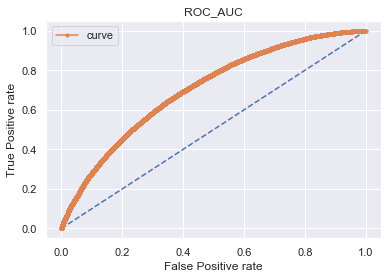

In [109]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_ppp[:,1])
pyplot.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.', label='curve')
plt.title('ROC_AUC')
plt.legend(loc='best')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [131]:
y_proba=best_reg.predict_proba(X_test)

In [132]:

auc = roc_auc_score(y_test, y_proba[:,1])
print("ROC-AUC score for l2-logit", round(auc,3))


ROC-AUC score for l2-logit 0.704


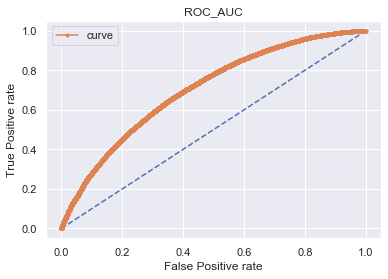

In [133]:
y_proba=reg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:,1])
pyplot.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='curve')
plt.title('ROC_AUC')
plt.legend(loc='best')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()


------

------

## Build a random forest model
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`

### Let's make without GridSearchCV and with

In [152]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [352]:
# random model testing
model = RandomForestClassifier(n_estimators=10, max_features=6, max_depth=2, random_state=1) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6391740046458863


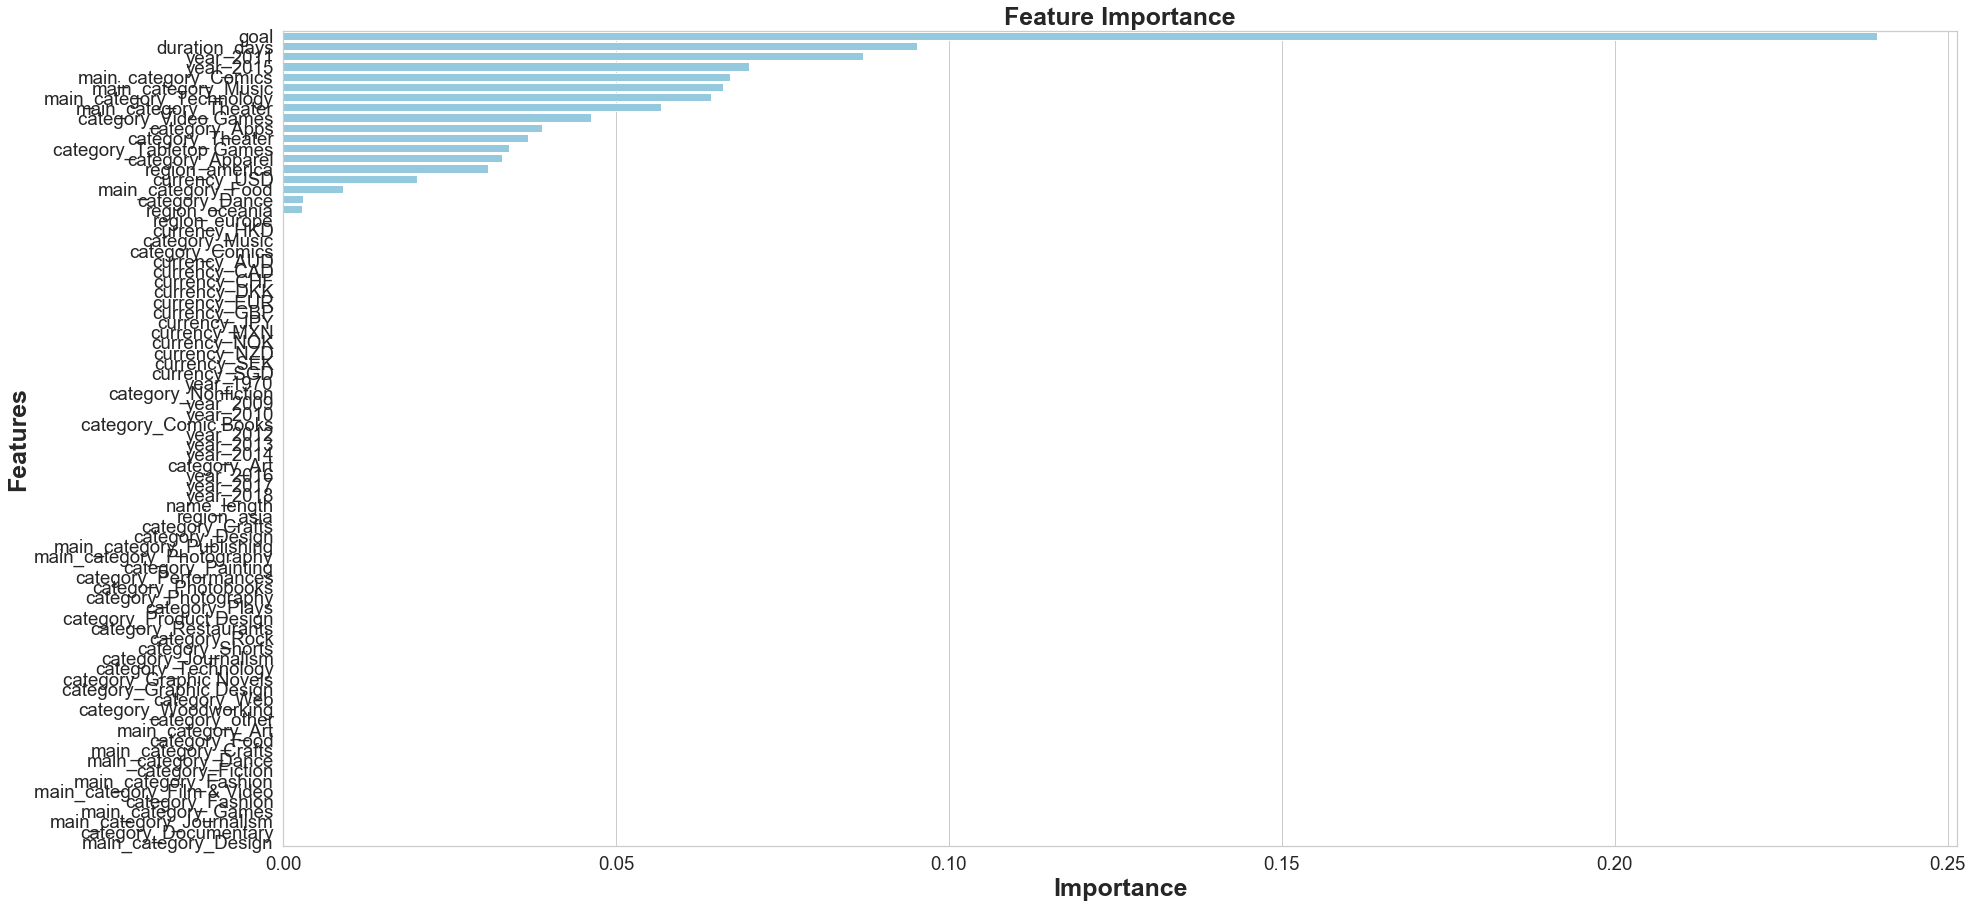

None

Features  Gini-Importance
0                       goal         0.239469
1              duration_days         0.095151
2                  year_2011         0.087055
3                  year_2015         0.069947
4       main_category_Comics         0.067102
..                       ...              ...
75          category_Fashion         0.000000
76       main_category_Games         0.000000
77  main_category_Journalism         0.000000
78      category_Documentary         0.000000
79      main_category_Design         0.000000

[80 rows x 2 columns]

In [153]:
feats = {}
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [136]:
RandErr=np.zeros((16,201))


In [137]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [138]:
i=0
j=0
k=0
rmse_val = {}
for dep in range(2,16):

    for nest in [10, 20, 50, 100, 200]:
        reg = RandomForestClassifier(n_estimators=nest, max_depth=dep, random_state=1, n_jobs=-1) 
        reg.fit(X_train, y_train)
        y_val_pred = reg.predict(X_val)
        rmse_val[k] = np.sqrt(mse(y_val_pred, y_val))
        k=k+1
        RandErr[dep,nest]= np.sqrt(mse(y_val_pred, y_val))
        
        
    
print(min(rmse_val.items(), key=lambda x: x[1]))

(69, 0.5572787770503392)


In [139]:
z=min(rmse_val.items(), key=lambda x: x[1])
z[1]

0.5572787770503392

In [140]:
RandErr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.60229437],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55948583],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55823221],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55727878]])

In [141]:
result = np.where(RandErr == z[1])

In [142]:
print(result)

(array([15]), array([200]))


In [143]:
best_RF = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=1, n_jobs=-1) 


In [144]:
best_RF.fit(X_train, y_train)
y_pred=best_RF.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.687537140078872


In [146]:
y_pr=best_RF.predict_proba(X_test)

In [155]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [156]:
rfc=RandomForestClassifier(random_state=42, n_jobs=-1)


In [158]:
param_grid = { 
    'n_estimators': [10, 20, 50, 100, 200],
    'max_features': ['auto'],
    'max_depth' : list(range(2,16))
}

In [161]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'ma

In [162]:
CV_rfc.best_params_

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 200}

In [164]:
top_RF=CV_rfc.best_estimator_

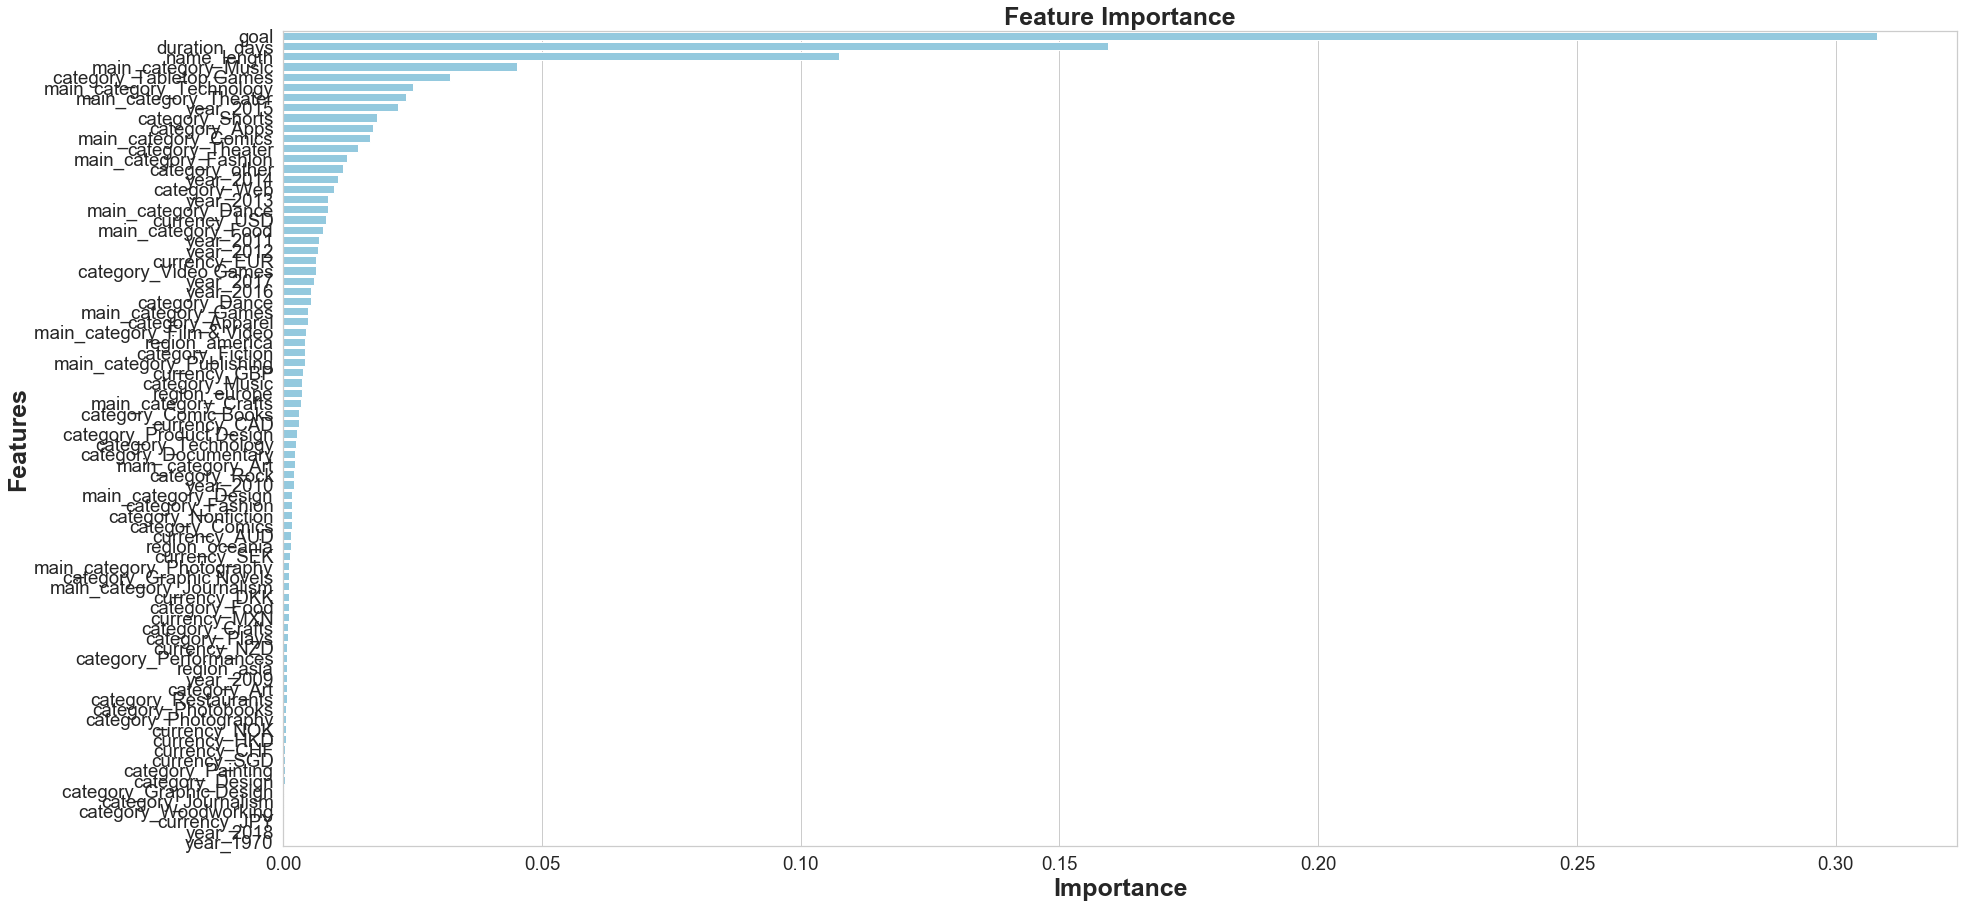

None

Features  Gini-Importance
0                      goal         0.308062
1             duration_days         0.159417
2               name_length         0.107471
3       main_category_Music         0.045169
4   category_Tabletop Games         0.032324
..                      ...              ...
75      category_Journalism         0.000154
76     category_Woodworking         0.000142
77             currency_JPY         0.000045
78                year_2018         0.000025
79                year_1970         0.000015

[80 rows x 2 columns]

In [165]:
feats = {}
for feature, importance in zip(X.columns, top_RF.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [166]:
y_proba_top=top_RF.predict_proba(X_test)

In [176]:
y_pred=top_RF.predict(X_test)

In [177]:
print(y_proba)

[[0.72347931 0.27652069]
 [0.61069276 0.38930724]
 [0.66873566 0.33126434]
 ...
 [0.49956379 0.50043621]
 [0.53875397 0.46124603]
 [0.81711262 0.18288738]]


In [178]:
print(y_pred)

[0 0 0 ... 1 1 0]


In [179]:
accuracy_score(y_test, y_pred)

0.6872130084814435

### Q4.6 What is an optimal depth and number of trees?

Answer: 15,200

### Q4.7 What is the accuracy for this params?

Answer: 0.687

### Q4.8 Build precision-recall curve. What is the precision for recall 0.5?

0.582

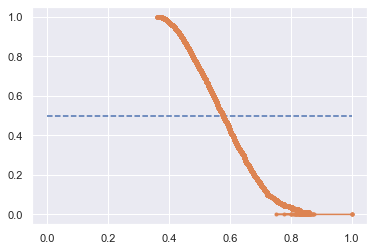

In [148]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pr[:,1])
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(precision, recall, marker='.')
plt.show()

Text(0, 0.5, 'precision')

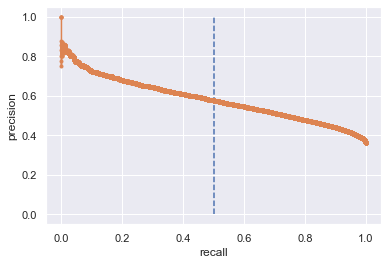

In [357]:
#pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot([0.5, 0.5], [0.0, 1.0], linestyle='--')
plt.plot(recall, precision, marker='.')

plt.xlabel('recall')
plt.ylabel('precision')

Text(0, 0.5, 'precision')

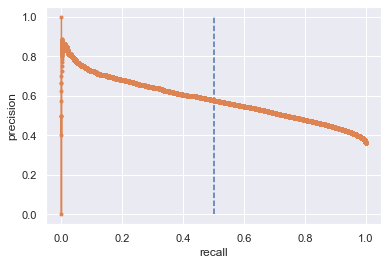

In [358]:
from sklearn.metrics import precision_recall_curve
precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_proba_top[:,1])
pyplot.plot([0.5, 0.5], [0.0, 1.0], linestyle='--')
plt.plot(recall1, precision1, marker='.')

plt.xlabel('recall')
plt.ylabel('precision')

### Q4.9 What is the two most important features by random forest?



------

Goal, duration_days

------

# Build the stronger model

### Q5.1 Generate two (or more) meaningfull features

In [189]:
df.head()

goal  state  duration_days  name_length  category_Apparel  \
ID                                                                         
1000002330   1000.0      0             58           31                 0   
1000003930  30000.0      0             59           45                 0   
1000004038  45000.0      0             44           14                 0   
1000007540   5000.0      0             29           49                 0   
1000011046  19500.0      0             55           58                 0   

            category_Apps  category_Art  category_Comic Books  \
ID                                                              
1000002330              0             0                     0   
1000003930              0             0                     0   
1000004038              0             0                     0   
1000007540              0             0                     0   
1000011046              0             0                     0   

            category_Comics  category_Crafts  ...  year_2013  year_2014  \
ID                                            ...                         
1000002330                0                0  ...          0          0   
1000003930                0                0  ...          0          0   
1000004038                0                0  ...          1          0   
1000007540                0                0  ...          0          0   
1000011046                0                0  ...          0          0   

            year_2015  year_2016  year_2017  year_2018  region_america  \
ID                                                                       
1000002330          1          0          0          0               0   
1000003930          0          0          1          0               1   
1000004038          0          0          0          0               1   
1000007540          0          0          0          0               1   
1000011046          1          0          0          0               1   

            region_asia  region_europe  region_oceania  
ID                                                      
1000002330            0              1               0  
1000003930            0              0               0  
1000004038            0              0               0  
1000007540            0              0               0  
1000011046            0              0               0  

[5 rows x 81 columns]

Let's add day_goal='goal'/'duration_days'. It represents average amount of money, that should be received each day to suit deadline

In [202]:
df["day_goal"]=df["goal"]/(df['duration_days']+1)

In [203]:
df.head()

goal  state  duration_days  name_length  category_Apparel  \
ID                                                                         
1000002330   1000.0      0             58           31                 0   
1000003930  30000.0      0             59           45                 0   
1000004038  45000.0      0             44           14                 0   
1000007540   5000.0      0             29           49                 0   
1000011046  19500.0      0             55           58                 0   

            category_Apps  category_Art  category_Comic Books  \
ID                                                              
1000002330              0             0                     0   
1000003930              0             0                     0   
1000004038              0             0                     0   
1000007540              0             0                     0   
1000011046              0             0                     0   

            category_Comics  category_Crafts  ...  year_2016  year_2017  \
ID                                            ...                         
1000002330                0                0  ...          0          0   
1000003930                0                0  ...          0          1   
1000004038                0                0  ...          0          0   
1000007540                0                0  ...          0          0   
1000011046                0                0  ...          0          0   

            year_2018  region_america  region_asia  region_europe  \
ID                                                                  
1000002330          0               0            0              1   
1000003930          0               1            0              0   
1000004038          0               1            0              0   
1000007540          0               1            0              0   
1000011046          0               1            0              0   

            region_oceania     day_goal  usd_goal_real  is_outlier  
ID                                                                  
1000002330               0    16.949153        1533.95           0  
1000003930               0   500.000000       30000.00           0  
1000004038               0  1000.000000       45000.00           1  
1000007540               0   166.666667        5000.00           0  
1000011046               0   348.214286       19500.00           0  

[5 rows x 84 columns]

In [204]:
df['usd_goal_real']=df32['usd_goal_real']

In [205]:
#let's add column 'is_outlier' in terms of goal (usd_goal_real)
df1=df["usd_goal_real"]
print(df1.quantile(q=0.50))
q1=df1.quantile(q=0.25)
q3=df1.quantile(q=0.75)
iqr=q3-q1
outlier1=q1-1.5*iqr
outlier2=q3+1.5*iqr
df["is_outlier"]=df["usd_goal_real"].apply(lambda x: 1 if (x<outlier1)|(x>outlier2) else 0)
df.head()

5500.0


goal  state  duration_days  name_length  category_Apparel  \
ID                                                                         
1000002330   1000.0      0             58           31                 0   
1000003930  30000.0      0             59           45                 0   
1000004038  45000.0      0             44           14                 0   
1000007540   5000.0      0             29           49                 0   
1000011046  19500.0      0             55           58                 0   

            category_Apps  category_Art  category_Comic Books  \
ID                                                              
1000002330              0             0                     0   
1000003930              0             0                     0   
1000004038              0             0                     0   
1000007540              0             0                     0   
1000011046              0             0                     0   

            category_Comics  category_Crafts  ...  year_2016  year_2017  \
ID                                            ...                         
1000002330                0                0  ...          0          0   
1000003930                0                0  ...          0          1   
1000004038                0                0  ...          0          0   
1000007540                0                0  ...          0          0   
1000011046                0                0  ...          0          0   

            year_2018  region_america  region_asia  region_europe  \
ID                                                                  
1000002330          0               0            0              1   
1000003930          0               1            0              0   
1000004038          0               1            0              0   
1000007540          0               1            0              0   
1000011046          0               1            0              0   

            region_oceania     day_goal  usd_goal_real  is_outlier  
ID                                                                  
1000002330               0    16.949153        1533.95           0  
1000003930               0   500.000000       30000.00           0  
1000004038               0  1000.000000       45000.00           1  
1000007540               0   166.666667        5000.00           0  
1000011046               0   348.214286       19500.00           0  

[5 rows x 84 columns]

In [206]:
df["is_outlier"].value_counts()

0    325991
1     44228
Name: is_outlier, dtype: int64

In [207]:
df['day_goal'].value_counts()

166.666667     17841
333.333333     15336
33.333333      10084
100.000000      9716
500.000000      8773
               ...  
768.750000         1
58.600000          1
6.320000           1
34.950000          1
2903.703704        1
Name: day_goal, Length: 18285, dtype: int64



### Q5.2 Train an xgboost, that's beat random forest

In [257]:

import xgboost as xgb

In [258]:
from sklearn.metrics import mean_squared_error

In [260]:
y = df['state'] 
X = df.drop('state', axis=1)

In [261]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
xg_clf = xgb.XGBClassifier(learning_rate = 0.2, max_depth = 7,  n_estimators = 100)
#alpha = 10,

In [269]:
xg_clf.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [270]:

preds = xg_clf.predict(X_test)
preds

array([0, 0, 0, ..., 0, 1, 0])

In [271]:
accuracy_score(preds, y_test)

0.7001512614121334

### So, we got better result, than with LogitReg or RandomForest. That's why I'm not going to run gridsearch  //ofc, we will probably find out better parametrs and receive better result, but I'm sick and tired of waiting for results :)  